In [1]:
import sys
import numpy             as     np
import pylab             as     pl
import astropy.io.fits   as     fits

from   astropy.table     import Table, join, unique
from   matplotlib.pyplot import figure

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [3]:
from   schechter         import schechter
from   SV3.define_sample import define_sample
from   ajs_kcorr         import ajs_kcorr
from   mxxl_ecorr        import mxxl_ecorr
from   ref_gmr           import ajs_reference_gmr
from   params            import params
from   zlimits           import zmin, zmax
from   ddps              import set_ddps
from   vmax              import vmax
from   distances         import dist_mod
from   scipy             import stats

In [4]:
version = 0.6

In [5]:
bright_merge_obs = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/MXXL/bright_v{:.1f}.fits'.format(version))
bright_merge_obs

MOCKRA,MOCKDEC,Z,ZOBS,MRH,RMAG_DRED,REFGMR0P1,GTYPE,HMASS,NMOCK,RA,DEC,TARGETID
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64
70.3273696899414,25.89268684387207,0.12769781053066254,0.1271754950284958,-19.007604598999023,19.0389404296875,0.7329427003860474,0.0,24.694326400756836,4,151.05778431871462,2.3529754106175886,0
68.56790924072266,25.862361907958984,0.13574250042438507,0.13657332956790924,-20.306686401367188,17.900495529174805,0.86435866355896,0.0,75.93505096435547,4,149.48766725657433,2.1398708806658533,1
80.89179992675781,26.706283569335938,0.33277422189712524,0.3358469009399414,-21.43029022216797,19.260910034179688,0.905381441116333,0.0,376.99798583984375,3,151.45973775436238,3.222913875547519,2
81.11534881591797,26.14855194091797,0.22037920355796814,0.22072993218898773,-20.052936553955078,19.431758880615234,0.8909478187561035,0.0,52.295162200927734,3,151.72919659282448,2.6949696711554765,3
78.56082916259766,24.647912979125977,0.11645698547363281,0.11806387454271317,-19.001338958740234,18.81563377380371,0.6731806397438049,0.0,25.76713752746582,3,149.61420930044986,0.9320106194848705,4
78.57237243652344,24.67148780822754,0.11663307249546051,0.11768244951963425,-21.514705657958984,16.31368064880371,0.9457125663757324,0.0,366.99139404296875,3,149.62205916724903,0.9565915167126775,5
78.15650939941406,25.19784164428711,0.0684894323348999,0.06795936077833176,-19.52063751220703,17.037307739257812,0.4790876507759094,0.0,39.510921478271484,3,149.19023150375648,1.4391456959625657,6
70.76897430419922,26.040807723999023,0.2862575054168701,0.2878228724002838,-21.3984317779541,18.863229751586914,0.9986308217048645,0.0,380.79949951171875,4,151.43387107002738,2.548896348870784,7
80.83235168457031,26.091585159301758,0.27930906414985657,0.27769073843955994,-21.707773208618164,18.49768829345703,1.0659780502319336,0.0,390.31024169921875,3,151.4840594038347,2.606391747377657,8


In [6]:
x = ajs_kcorr()

In [7]:
sample = bright_merge_obs[:5000]

In [8]:
sample['Es'] = sample['RMAG_DRED'].data - (sample['MRH'].data + x.eval(sample['REFGMR0P1'].data, sample['Z'].data, band='r') + dist_mod(sample['Z'].data))

In [9]:
np.sort(sample['Es'].data)

array([0.00150307, 0.00150379, 0.00150477, ..., 0.001599  , 0.00159937,
       0.00159938])

In [10]:
res = stats.linregress(sample['Z'].data - 0.1, sample['Es'].data)

In [11]:
res.slope, res.intercept

(0.00019416851801997505, 0.0015204769643633737)

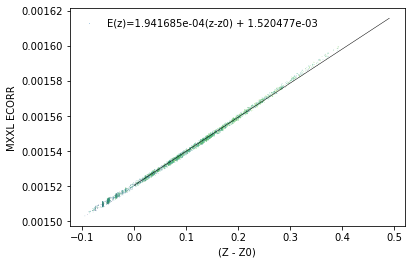

In [12]:
zs = np.arange(0.0, 0.5, 0.01)

pl.plot(zs, zs * res.slope + res.intercept, lw=0.5, c='k')

pl.scatter(sample['Z'].data - 0.1, sample['Es'].data, marker='.', lw=0.0, s=1, c=sample['REFGMR0P1'].data, label='E(z)={:.6e}(z-z0) + {:.6e}'.format(res.slope, res.intercept))

pl.xlabel('(Z - Z0)')
pl.ylabel('MXXL ECORR')

pl.legend(frameon=False)

# Done.